In [10]:
import pandas as pd
import numpy as np
from itertools import product
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
data_path = '/burg/glab/users/al4385/data/TFT_30/BET.pickle'
pred_path = '/burg/glab/users/al4385/predictions/TFT_30_0429/pred_BET.pkl'

with open(pred_path,'rb') as fp:
    preds = pickle.load(fp)

In [3]:
preds.keys()

dict_keys(['predicted_quantiles', 'static_weights', 'historical_selection_weights', 'future_selection_weights', 'attention_scores'])

In [4]:
with open(data_path,'rb') as fp:
    data = pickle.load(fp)
coord_path ='/burg/glab/users/al4385/data/coordinates/BET.parquet'
coords=pd.read_parquet(coord_path)

#extract values 
df = pd.DataFrame({
    'Index': data['data_sets']['test']['id'].flatten(),
    'Flattened_Values': data['data_sets']['test']['target'].flatten(),})
df['pred_05'] = preds['predicted_quantiles'][:, :, 1].flatten()
df[['location_id', 'time_id']] = df['Index'].str.split('_', n=1, expand=True)
df['time_id'] = pd.to_datetime(df['time_id'])
df['doy']=df['time_id'].dt.dayofyear
df['location_id'] = df['location_id'].astype(int)
df = df.sort_values(by=['location_id','time_id'])
df['year']= df['time_id'].dt.year
df['month']= df['time_id'].dt.month
df['day']= df['time_id'].dt.day

/burg/opt/anaconda3-2023.09/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/burg/opt/anaconda3-2023.09/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator QuantileTransformer from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/burg/opt/anaconda3-2023.09/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.

In [6]:
df

,Index,Flattened_Values,pred_05,location_id,time_id,doy,year,month,day
0,0_2002-01-01,-0.800032,-0.803970,0,2002-01-01,1,2002,1,1
1,0_2002-01-02,-0.799115,-0.804782,0,2002-01-02,2,2002,1,2
2,0_2002-01-03,-0.798197,-0.805837,0,2002-01-03,3,2002,1,3
3,0_2002-01-04,-0.797279,-0.805617,0,2002-01-04,4,2002,1,4
4,0_2002-01-05,-0.796362,-0.805523,0,2002-01-05,5,2002,1,5
...,...,...,...,...,...,...,...,...,...
4453975,17999_2010-09-18,0.954939,0.583667,17999,2010-09-18,261,2010,9,18
4453976,17999_2010-09-19,0.929644,0.534745,17999,2010-09-19,262,2010,9,19
4453977,17999_2010-09-20,0.902241,0.496578,17999,2010-09-20,263,2010,9,20
4453978,17999_2010-09-21,0.872729,0.458734,17999,2010-09-21,264,2010,9,21


In [5]:
data_df = coords#['test']
data_df = data_df.rename(columns={ 'location': 'location_id'})
data_df = data_df.drop_duplicates()
both = pd.merge(df, data_df, on='location_id', how='left')

In [6]:
df=both[both['latitude']<-10]
#df=df[df['latitude']>23]
#df=df[df['longitude']<55]
#df=df[df['longitude']>=-22]
b= df[df['year']==2005][::30]
b[b['month']==4][:50]

,Index,Flattened_Values,pred_05,location_id,time_id,doy,year,month,day,latitude,longitude
3827047,15466_2005-04-15,1.040813,0.989584,15466,2005-04-15,105,2005,4,15,-10.25,-75.00
3828037,15470_2005-04-22,0.462174,0.420863,15470,2005-04-22,112,2005,4,22,-10.25,-74.00
3829027,15474_2005-04-29,0.487827,0.436102,15474,2005-04-29,119,2005,4,29,-10.25,-73.00
3839186,15515_2005-04-21,0.234896,0.255924,15515,2005-04-21,111,2005,4,21,-10.25,-60.25
3840159,15519_2005-04-11,0.468480,0.493059,15519,2005-04-11,101,2005,4,11,-10.25,-59.25
3841155,15523_2005-04-24,0.652561,0.587682,15523,2005-04-24,114,2005,4,24,-10.25,-58.25
3851301,15564_2005-04-03,0.681940,0.861829,15564,2005-04-03,93,2005,4,3,-10.50,-71.25
3852287,15568_2005-04-06,0.719927,0.805552,15568,2005-04-06,96,2005,4,6,-10.50,-70.25
3853266,15572_2005-04-02,1.045099,1.022989,15572,2005-04-02,92,2005,4,2,-10.50,-69.25
3854268,15576_2005-04-21,0.761236,0.689256,15576,2005-04-21,111,2005,4,21,-10.50,-68.25


In [7]:
df=both[both['latitude']<-10]
#df=df[df['latitude']>23]
#df=df[df['longitude']<55]
#df=df[df['longitude']>=-22]


In [8]:
a=df[df['year']==2005]
filtered_df = a.groupby('location_id').filter(lambda x: (x['time_id'].iloc[0] >= pd.Timestamp('2005-08-20')) and (x['time_id'].iloc[0] <= pd.Timestamp('2005-08-24')))
indices_array = np.unique(filtered_df[::30].index.to_numpy())
select_indices=np.round(indices_array/30).astype(int)

In [11]:
select_indices

array([128665, 129135, 129605, 130075, 130546, 131923, 132393, 132863,
       133333, 133804, 135181, 135651, 136121, 136591, 137062, 138439,
       138909, 139379, 139849, 140320, 141697, 142167, 142637, 143107,
       143578, 144955, 145425, 145895, 146365, 146836, 148213])

In [12]:
filtered_df[::30]

,Index,Flattened_Values,pred_05,location_id,time_id,doy,year,month,day,latitude,longitude
3859950,15599_2005-08-20,-0.052492,-0.074270,15599,2005-08-20,232,2005,8,20,-10.50,-60.75
3874050,15656_2005-08-21,-0.929030,-0.980427,15656,2005-08-21,233,2005,8,21,-10.75,-69.00
3888150,15713_2005-08-22,-2.279673,-2.298920,15713,2005-08-22,234,2005,8,22,-11.00,-75.75
3902250,15770_2005-08-23,0.172666,0.170923,15770,2005-08-23,235,2005,8,23,-11.00,-60.00
3916380,15827_2005-08-24,-0.200571,-0.218272,15827,2005-08-24,236,2005,8,24,-11.25,-67.75
3957690,15994_2005-08-20,-0.876037,-0.906375,15994,2005-08-20,232,2005,8,20,-11.75,-66.75
3971790,16051_2005-08-21,0.205433,0.187237,16051,2005-08-21,233,2005,8,21,-12.00,-72.00
3985890,16108_2005-08-22,-0.962976,-0.975701,16108,2005-08-22,234,2005,8,22,-12.00,-55.25
3999990,16165_2005-08-23,-1.189998,-1.258608,16165,2005-08-23,235,2005,8,23,-12.25,-61.25
4014120,16222_2005-08-24,-0.082528,-0.086222,16222,2005-08-24,236,2005,8,24,-12.50,-68.75


In [147]:
a=df[df['year']==2006]
filtered_df = a.groupby('location_id').filter(lambda x: x['time_id'].iloc[0] == pd.Timestamp('2006-09-16'))
indices_array = np.unique(filtered_df[::30].index.to_numpy())
select_indices=np.round(indices_array/30).astype(int)

In [148]:
select_indices

array([   194,   3452,   6710,   9968,  13226,  16484,  19742,  23000,
        26258,  29516,  32774,  36032,  39290,  42548,  45806,  49064,
        52322,  55580,  58838,  62096,  65354,  68612,  71870,  75128,
        78386,  81644,  84902,  88160,  91418,  94676,  97934, 101192,
       104450, 107708, 110966, 114224, 117482, 120740, 123998, 127256,
       130514, 133772, 137030, 140288, 143546, 146804])

In [13]:
csif_list=[]
tmin_list=[]
tmax_list=[]
rad_list=[]
precip_list=[]
photo_list=[]
SM_list=[]
for index in select_indices:
    csif_list.append(np.array(preds['historical_selection_weights'][index][:,0]))
    tmin_list.append(np.concatenate([np.array(preds['historical_selection_weights'][index][:,1]),np.array(preds['future_selection_weights'][index][:,0])], axis=0))
    tmax_list.append(np.concatenate([np.array(preds['historical_selection_weights'][index][:,2]),np.array(preds['future_selection_weights'][index][:,1])], axis=0))
    rad_list.append(np.concatenate([np.array(preds['historical_selection_weights'][index][:,3]),np.array(preds['future_selection_weights'][index][:,2])], axis=0))
    precip_list.append(np.concatenate([np.array(preds['historical_selection_weights'][index][:,4]),np.array(preds['future_selection_weights'][index][:,3])], axis=0))
    photo_list.append(np.concatenate([np.array(preds['historical_selection_weights'][index][:,5]),np.array(preds['future_selection_weights'][index][:,4])], axis=0))
    SM_list.append(np.concatenate([np.array(preds['historical_selection_weights'][index][:,6]),np.array(preds['future_selection_weights'][index][:,4])], axis=0))

stacked_csif= np.stack(csif_list, axis=0)
stacked_tmin= np.stack(tmin_list, axis=0)
stacked_tmax= np.stack(tmax_list, axis=0)
stacked_rad= np.stack(rad_list, axis=0)
stacked_precip= np.stack(precip_list, axis=0)
stacked_photo= np.stack(photo_list, axis=0)
stacked_SM= np.stack(SM_list, axis=0)

In [14]:
mean_csif= np.mean(stacked_csif, axis=0)
mean_tmin= np.mean(stacked_tmin, axis=0)
mean_tmax= np.mean(stacked_tmax, axis=0)
mean_rad= np.mean(stacked_rad, axis=0)
mean_precip= np.mean(stacked_precip, axis=0)
mean_photo= np.mean(stacked_photo, axis=0)
mean_SM= np.mean(stacked_SM, axis=0)

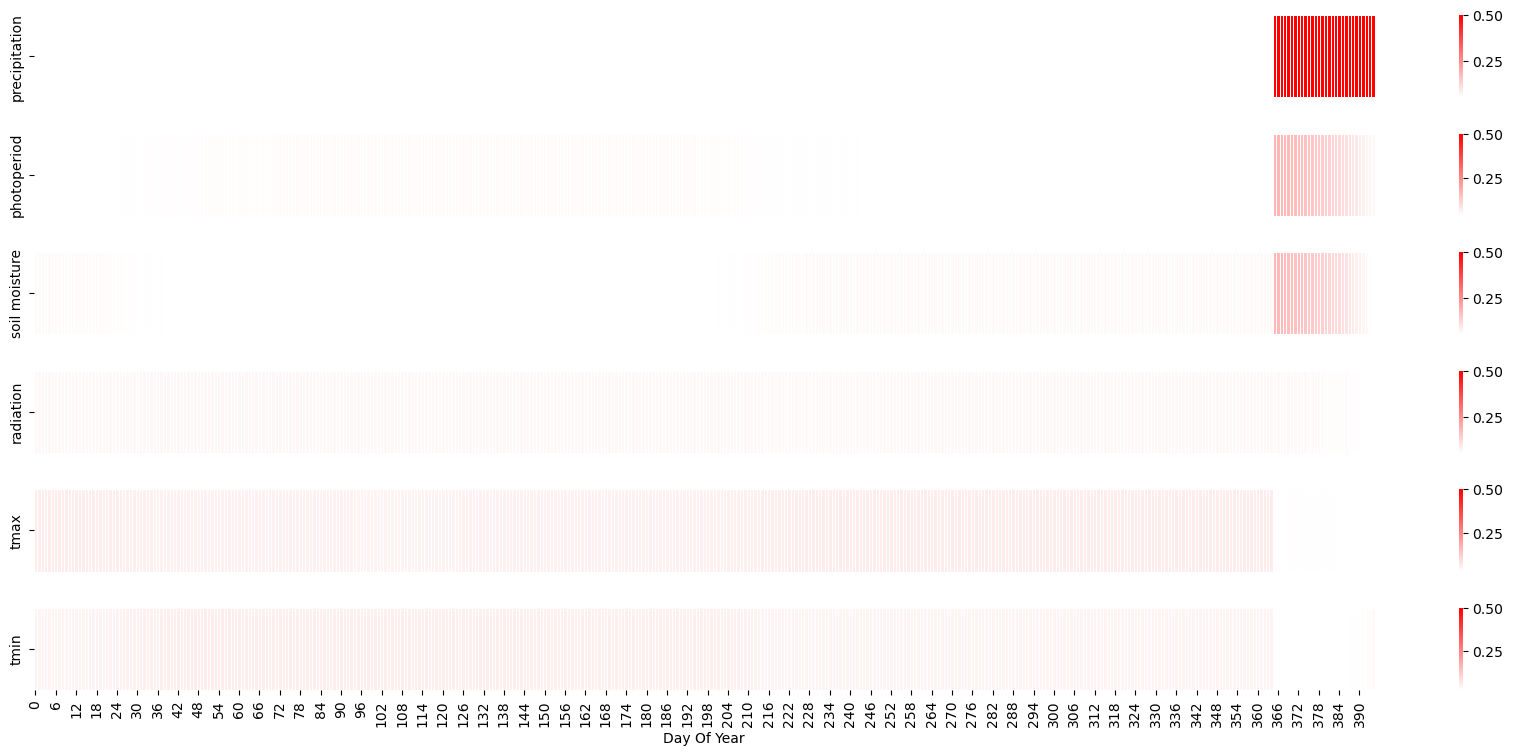

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# Sample DataFrame creation
data_f = {
        'tmin': mean_tmin,
        'tmax': mean_tmax,
        'radiation': mean_rad,
        'precipitation': mean_precip,
        'photoperiod': mean_photo,
        'soil moisture': mean_SM}

df_f = pd.DataFrame(data_f)
#df_f=df_f[df_f['DOY']>=60]
#df_f=df_f[df_f['DOY']<=120]

# Sort features based on the maximum value of each column
sorted_features = df_f.iloc[:, :].max().sort_values(ascending=False).index.tolist()

# Set the figure size for subplots
plt.figure(figsize=(17, 8))
cmap0 = LinearSegmentedColormap.from_list('', ['white', 'red'])

# Create subplots for each feature
for i, feature in enumerate(sorted_features, 1):
    ax = plt.subplot(7, 1, i)

    # Reshape the DataFrame for each feature's heatmap
    heatmap_data = df_f[[ feature]].transpose()

    # Plotting the heatmap for each feature
    sns.heatmap(heatmap_data, cmap=cmap0, vmax=0.5,  annot=False, fmt='.2f', linewidths=.5, cbar=True)
    if i <6:
        # Remove x-axis labels and ticks
        ax.set_xticks([])
        ax.set_xticklabels([])

    # Remove title
    ax.set_title('')
    ax.set_xlabel('')


    # Remove y-axis label
    ax.set_ylabel('')

# Remove vertical space between subplots
#ax.set_xticks(df_f['DOY'][::30])
#ax.set_xticklabels(df_f['DOY'][::30])
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.xlabel('Day Of Year')
# Show the plot
plt.show()



In [141]:
att_mat_list=[]
csif_list=[]
tmin_list=[]
tmax_list=[]
rad_list=[]
precip_list=[]
photo_list=[]
SM_list=[]
for index in select_indices:
    att_mat_list.append(preds['attention_scores'][index])
    csif_list.append(np.concatenate([np.array(data['data_sets']['test']['historical_ts_numeric'][index][:,0]),np.array(data['data_sets']['test']['target'][index])], axis=0))
    tmin_list.append(np.concatenate([np.array(data['data_sets']['test']['historical_ts_numeric'][index][:,1]),np.array(data['data_sets']['test']['future_ts_numeric'][index][:,0])], axis=0))
    tmax_list.append(np.concatenate([np.array(data['data_sets']['test']['historical_ts_numeric'][index][:,2]),np.array(data['data_sets']['test']['future_ts_numeric'][index][:,1])], axis=0))
    rad_list.append(np.concatenate([np.array(data['data_sets']['test']['historical_ts_numeric'][index][:,3]),np.array(data['data_sets']['test']['future_ts_numeric'][index][:,2])], axis=0))
    precip_list.append(np.concatenate([np.array(data['data_sets']['test']['historical_ts_numeric'][index][:,4]),np.array(data['data_sets']['test']['future_ts_numeric'][index][:,3])], axis=0))
    photo_list.append(np.concatenate([np.array(data['data_sets']['test']['historical_ts_numeric'][index][:,5]),np.array(data['data_sets']['test']['future_ts_numeric'][index][:,4])], axis=0))
    SM_list.append(np.concatenate([np.array(data['data_sets']['test']['historical_ts_numeric'][index][:,6]),np.array(data['data_sets']['test']['future_ts_numeric'][index][:,4])], axis=0))

stacked_att= np.stack(att_mat_list, axis=0)
stacked_csif= np.stack(csif_list, axis=0)
stacked_tmin= np.stack(tmin_list, axis=0)
stacked_tmax= np.stack(tmax_list, axis=0)
stacked_rad= np.stack(rad_list, axis=0)
stacked_precip= np.stack(precip_list, axis=0)
stacked_photo= np.stack(photo_list, axis=0)
stacked_SM= np.stack(SM_list, axis=0)

In [142]:
att_mean_array= np.mean(stacked_att, axis=0)
csif_mean_array= np.mean(stacked_csif, axis=0)
tmin_mean_array= np.mean(stacked_tmin, axis=0)
tmax_mean_array= np.mean(stacked_tmax, axis=0)
rad_mean_array= np.mean(stacked_rad, axis=0)
precip_mean_array= np.mean(stacked_precip, axis=0)
photo_mean_array= np.mean(stacked_photo, axis=0)
SM_mean_array= np.mean(stacked_SM, axis=0)

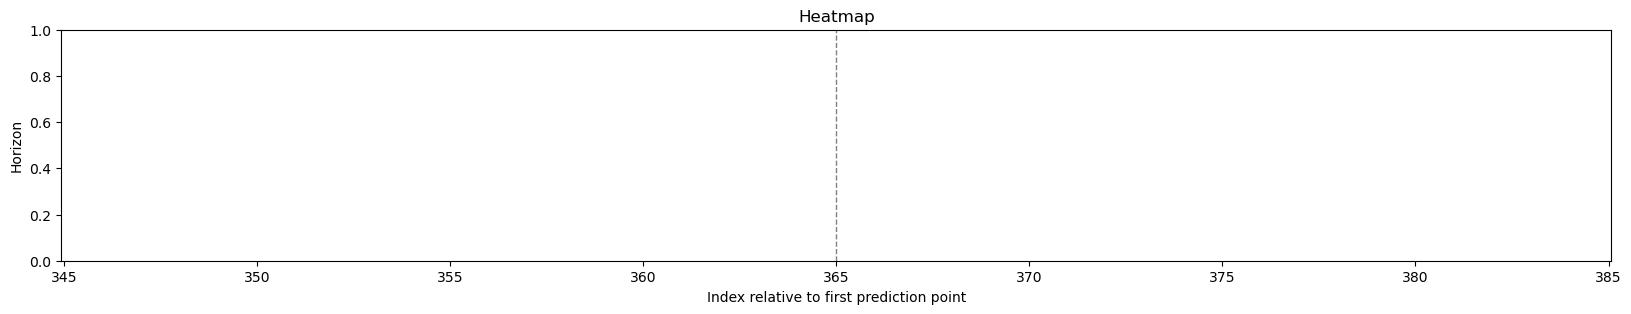

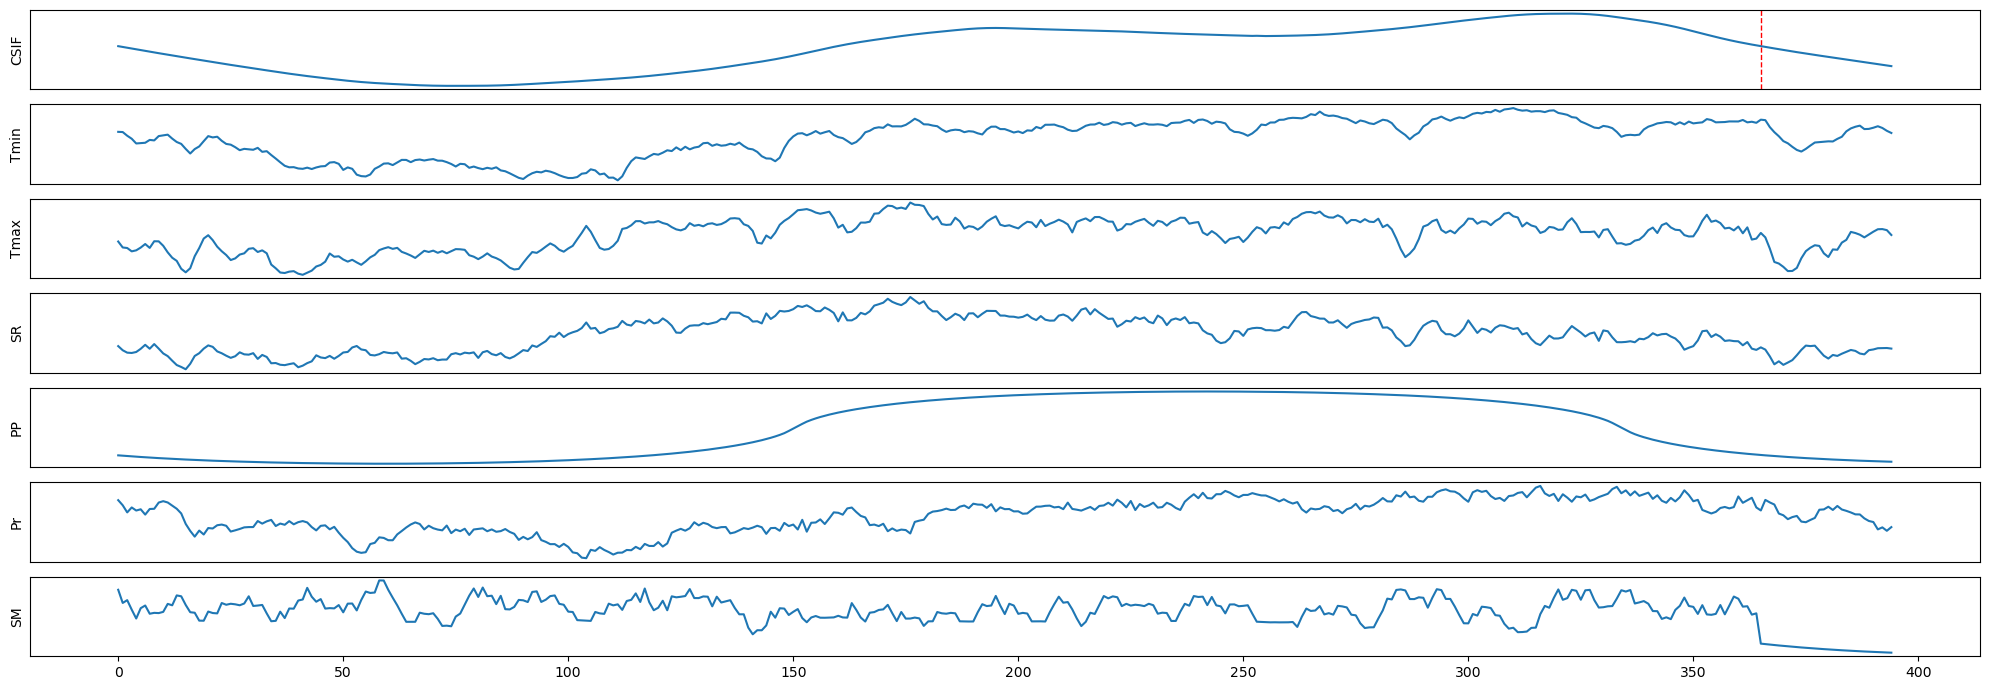

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec

# Create the heatmap
plt.figure(figsize=(20, 3))
#divider = make_axes_locatable(ax1)

#cax = divider.append_axes("bottom", size="5%", pad=0.5)
#sns.heatmap(att_mean_array, cmap='afmhot', cbar_ax=cax, cbar_kws={'orientation': 'horizontal'})
# Adding titles and labels as needed
vertical_line_position = 365  # Replace with your desired x position for the vertical line
plt.axvline(x=vertical_line_position, color='grey', linestyle='--', linewidth=1)
plt.title('Heatmap')
plt.xlabel('Index relative to first prediction point')
plt.ylabel('Horizon')

# Show the plot
plt.show()

# Create a figure with two subplots
fig, ( ax2,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(7,1, figsize=(20, 7))

# Plot the time series in the second subplot
ax2.plot(csif_mean_array, label='Random Data')
#ax2.set_xlabel('Time')
ax2.set_ylabel('CSIF')
ax2.axvline(x=vertical_line_position, color='red', linestyle='--', linewidth=1)
ax2.set_yticks([])
ax2.set_yticklabels([])
ax2.set_xticks([])
ax2.set_xticklabels([])


ax4.plot(tmin_mean_array, label='Random Data')
#ax4.set_xlabel('Time')
ax4.set_ylabel('Tmin')
ax4.set_yticks([])
ax4.set_yticklabels([])
ax4.set_xticks([])
ax4.set_xticklabels([])

ax5.plot(tmax_mean_array, label='Random Data')
#ax5.set_xlabel('Time')
ax5.set_ylabel('Tmax')
ax5.set_yticks([])
ax5.set_yticklabels([])
ax5.set_xticks([])
ax5.set_xticklabels([])

ax6.plot(rad_mean_array, label='Random Data')
#ax6.set_xlabel('Time')
ax6.set_ylabel('SR')
ax6.set_yticks([])
ax6.set_yticklabels([])
ax6.set_xticks([])
ax6.set_xticklabels([])

ax7.plot(photo_mean_array, label='Random Data')
#ax7.set_xlabel('Time')
ax7.set_ylabel('PP')
ax7.set_yticks([])
ax7.set_yticklabels([])
ax7.set_xticks([])
ax7.set_xticklabels([])

ax8.plot(precip_mean_array, label='Random Data')
#ax8.set_xlabel('Time')
ax8.set_ylabel('Pr')
ax8.set_yticks([])
ax8.set_yticklabels([])
ax8.set_xticks([])
ax8.set_xticklabels([])

ax9.plot(SM_mean_array, label='Random Data')
#ax9.set_xlabel('Time')
ax9.set_ylabel('SM')
ax9.set_yticks([])
ax9.set_yticklabels([])

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

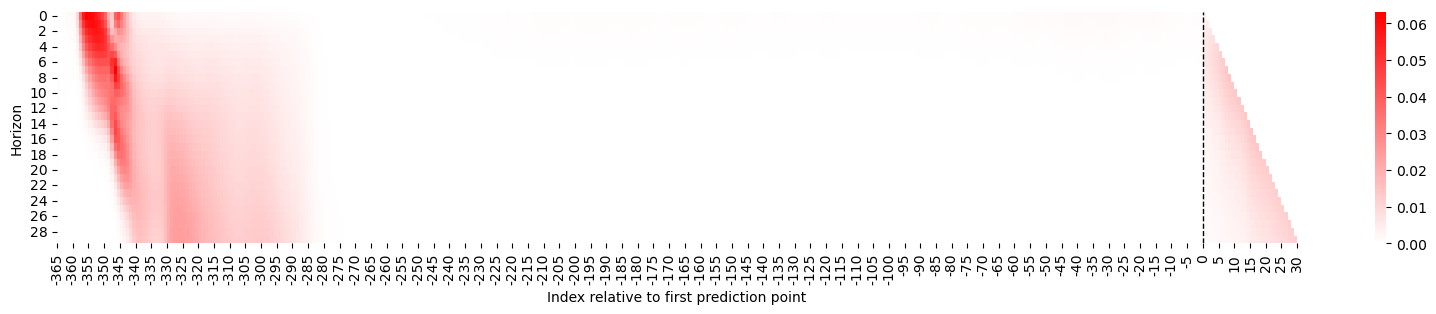

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Example data: Creating a random 10x10 matrix

# Create the heatmap
plt.figure(figsize=(20, 3))
cmap0 = LinearSegmentedColormap.from_list('', ['white', 'red'])
sns.heatmap(att_mean_array, cmap=cmap0)  # You can choose different colormaps like 'coolwarm', 'Blues', etc.
plt.axvline(x=365, color='black', linestyle='--', linewidth=1)
# Adding titles and labels as needed
plt.xlabel('Index relative to first prediction point')
plt.ylabel('Horizon')
# Set the x-axis tick positions
tick_positions = range(0, 396)[::5]
# Set the custom tick labels
custom_tick_labels = range(-365, 31)[::5]
# Set the tick labels
plt.xticks(tick_positions, custom_tick_labels)


# Show the plot
plt.show()

In [51]:
preds.keys()

dict_keys(['predicted_quantiles', 'static_weights', 'historical_selection_weights', 'future_selection_weights', 'attention_scores'])

In [82]:
full_tmin=np.concatenate([np.array(data['data_sets']['test']['historical_ts_numeric'][4][:,1]),np.array(data['data_sets']['test']['future_ts_numeric'][4][:,0])], axis=0)

In [79]:
data['feature_map']

{'static_feats_numeric': ['latitude', 'longitude'],
 'static_feats_categorical': ['soil'],
 'historical_ts_numeric': ['sif_clear_inst',
  'tmin',
  'tmax',
  'radiation',
  'precipitation',
  'photoperiod',
  'swvl1'],
 'historical_ts_categorical': [],
 'future_ts_numeric': ['tmin',
  'tmax',
  'radiation',
  'precipitation',
  'photoperiod',
  'swvl1'],
 'future_ts_categorical': []}

In [66]:
historic_csif = data['data_sets']['test']['historical_ts_numeric'][4][:,0]
future_csif= data['data_sets']['test']['target'][4]
full_csif=np.concatenate([np.array(historic_csif.flatten()),np.array(future_csif.flatten())], axis=0)

In [70]:
full_csif=np.concatenate([np.array(historic_csif.flatten()),np.array(future_csif.flatten())], axis=0)


In [157]:
preds['historical_selection_weights'].shape

(148466, 365, 7)

In [158]:
preds['future_selection_weights'].shape

(148466, 30, 6)

In [159]:
data['data_sets']['test']['historical_ts_numeric'].shape

(148466, 365, 7)

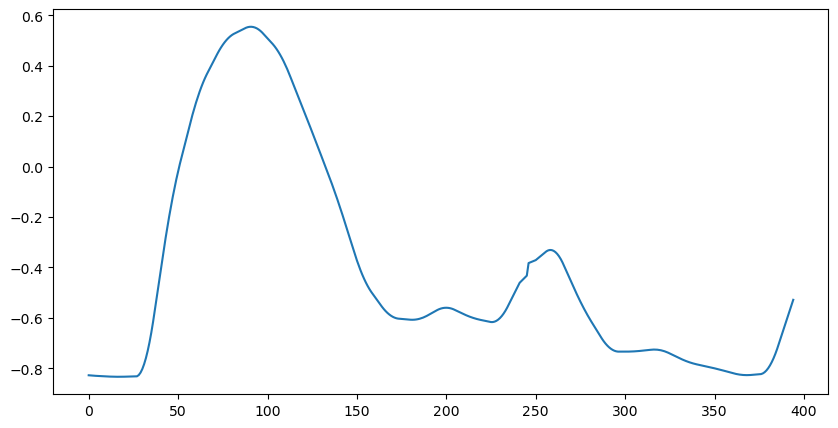

In [73]:
plt.figure(figsize=(10, 5))  # Set the figure size
# Plot the time series
plt.plot(full_csif, label='Random Data')

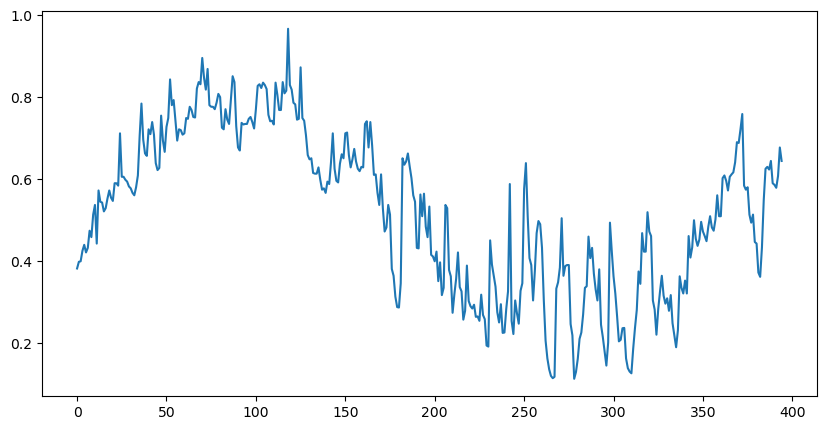

In [83]:
plt.figure(figsize=(10, 5))  # Set the figure size

# Plot the time series
plt.plot(full_tmin, label='Random Data')


In [107]:
historic_csif[-1]

-0.8250093

In [109]:
historic_csif[365]

IndexError: index 365 is out of bounds for axis 0 with size 365